In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt 
import seaborn as sn 
from dateutil import parser  

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.shape

(50000, 12)

In [4]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

Histograms

In [7]:
dataset2 = dataset.copy().drop(columns= ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [8]:
dataset2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


In [9]:
dataset2.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

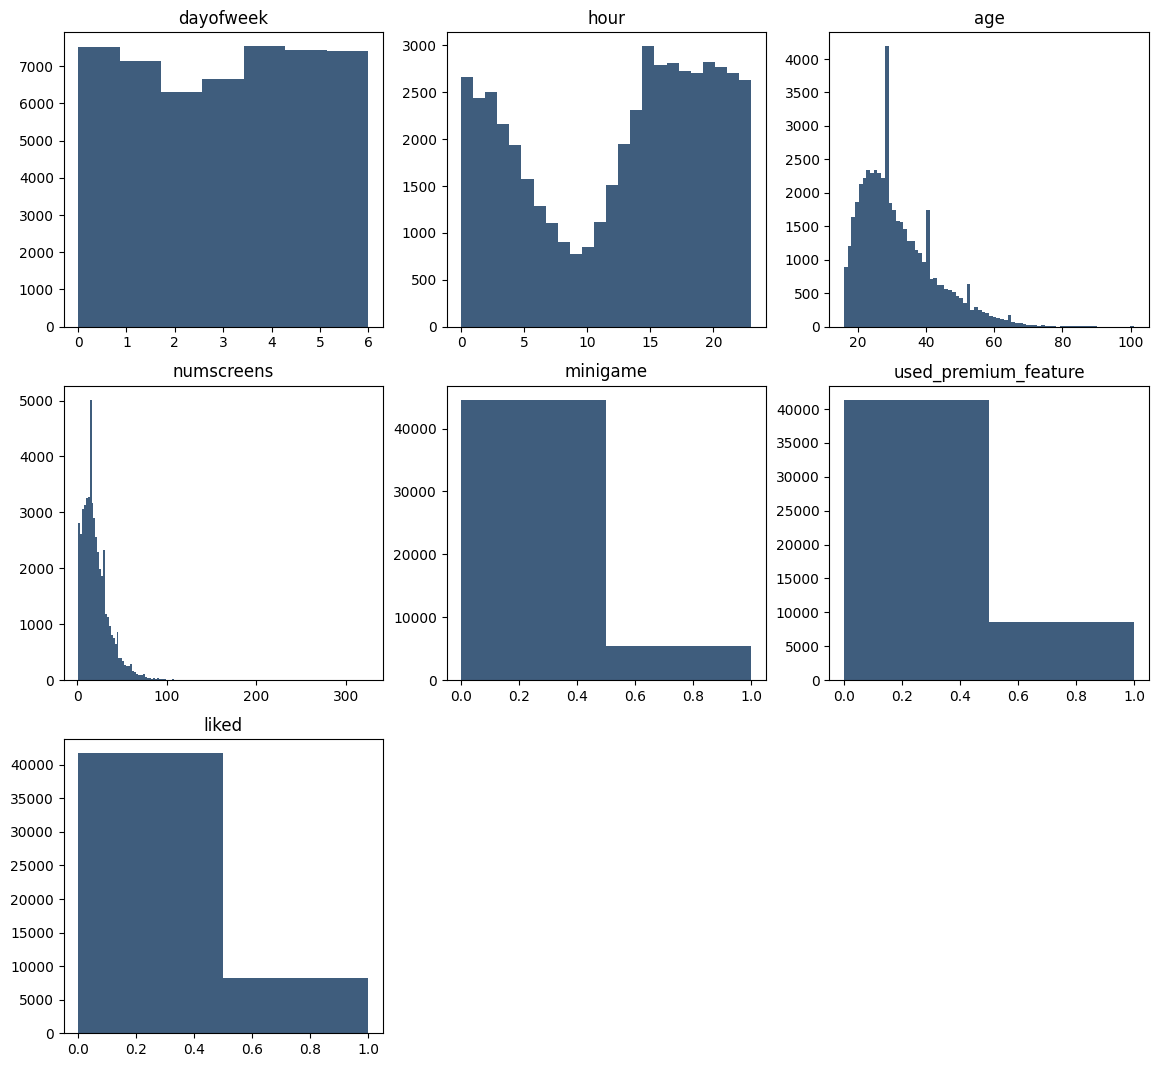

In [10]:
plt.suptitle('Histogram of Numerical Columns',)
plt.figure(figsize = (14,13))

for i in range(1, dataset2.shape[1] +1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D')

Correlation with response

In [11]:
type(dataset2.corrwith(dataset.enrolled))

pandas.core.series.Series

<Axes: title={'center': 'Correlation with Response Variable'}>

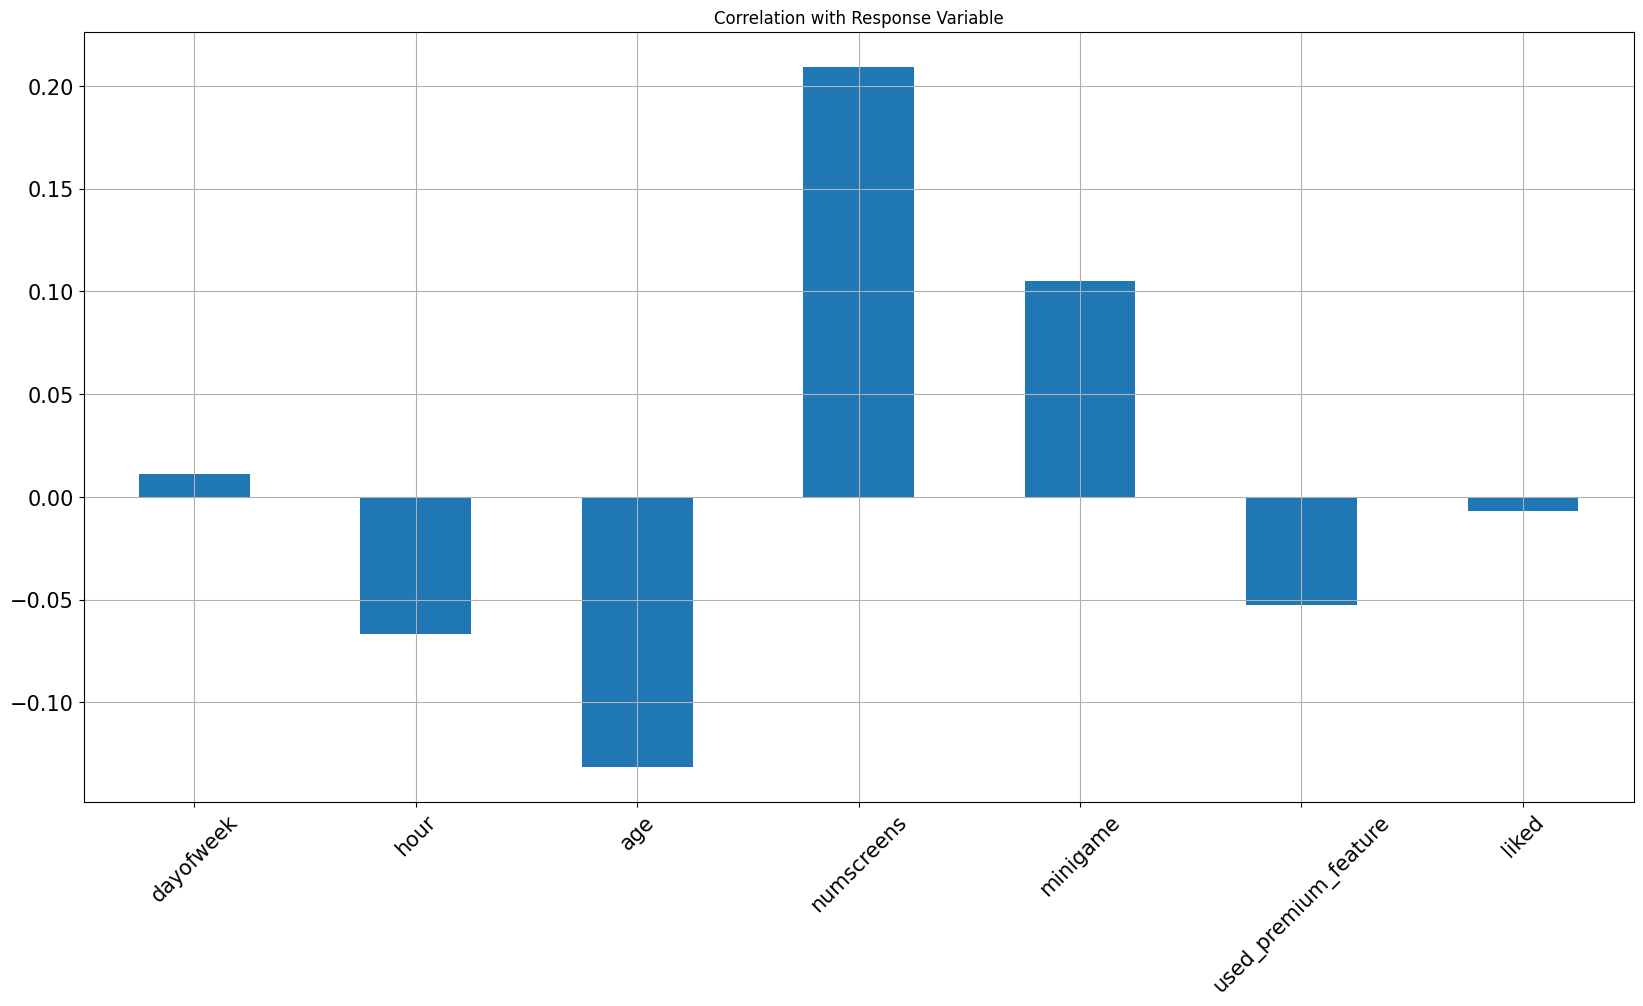

In [12]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                             title = "Correlation with Response Variable",
                                             fontsize = 15,rot = 45,
                                             grid = True    )

Correlation Matrix

<Axes: >

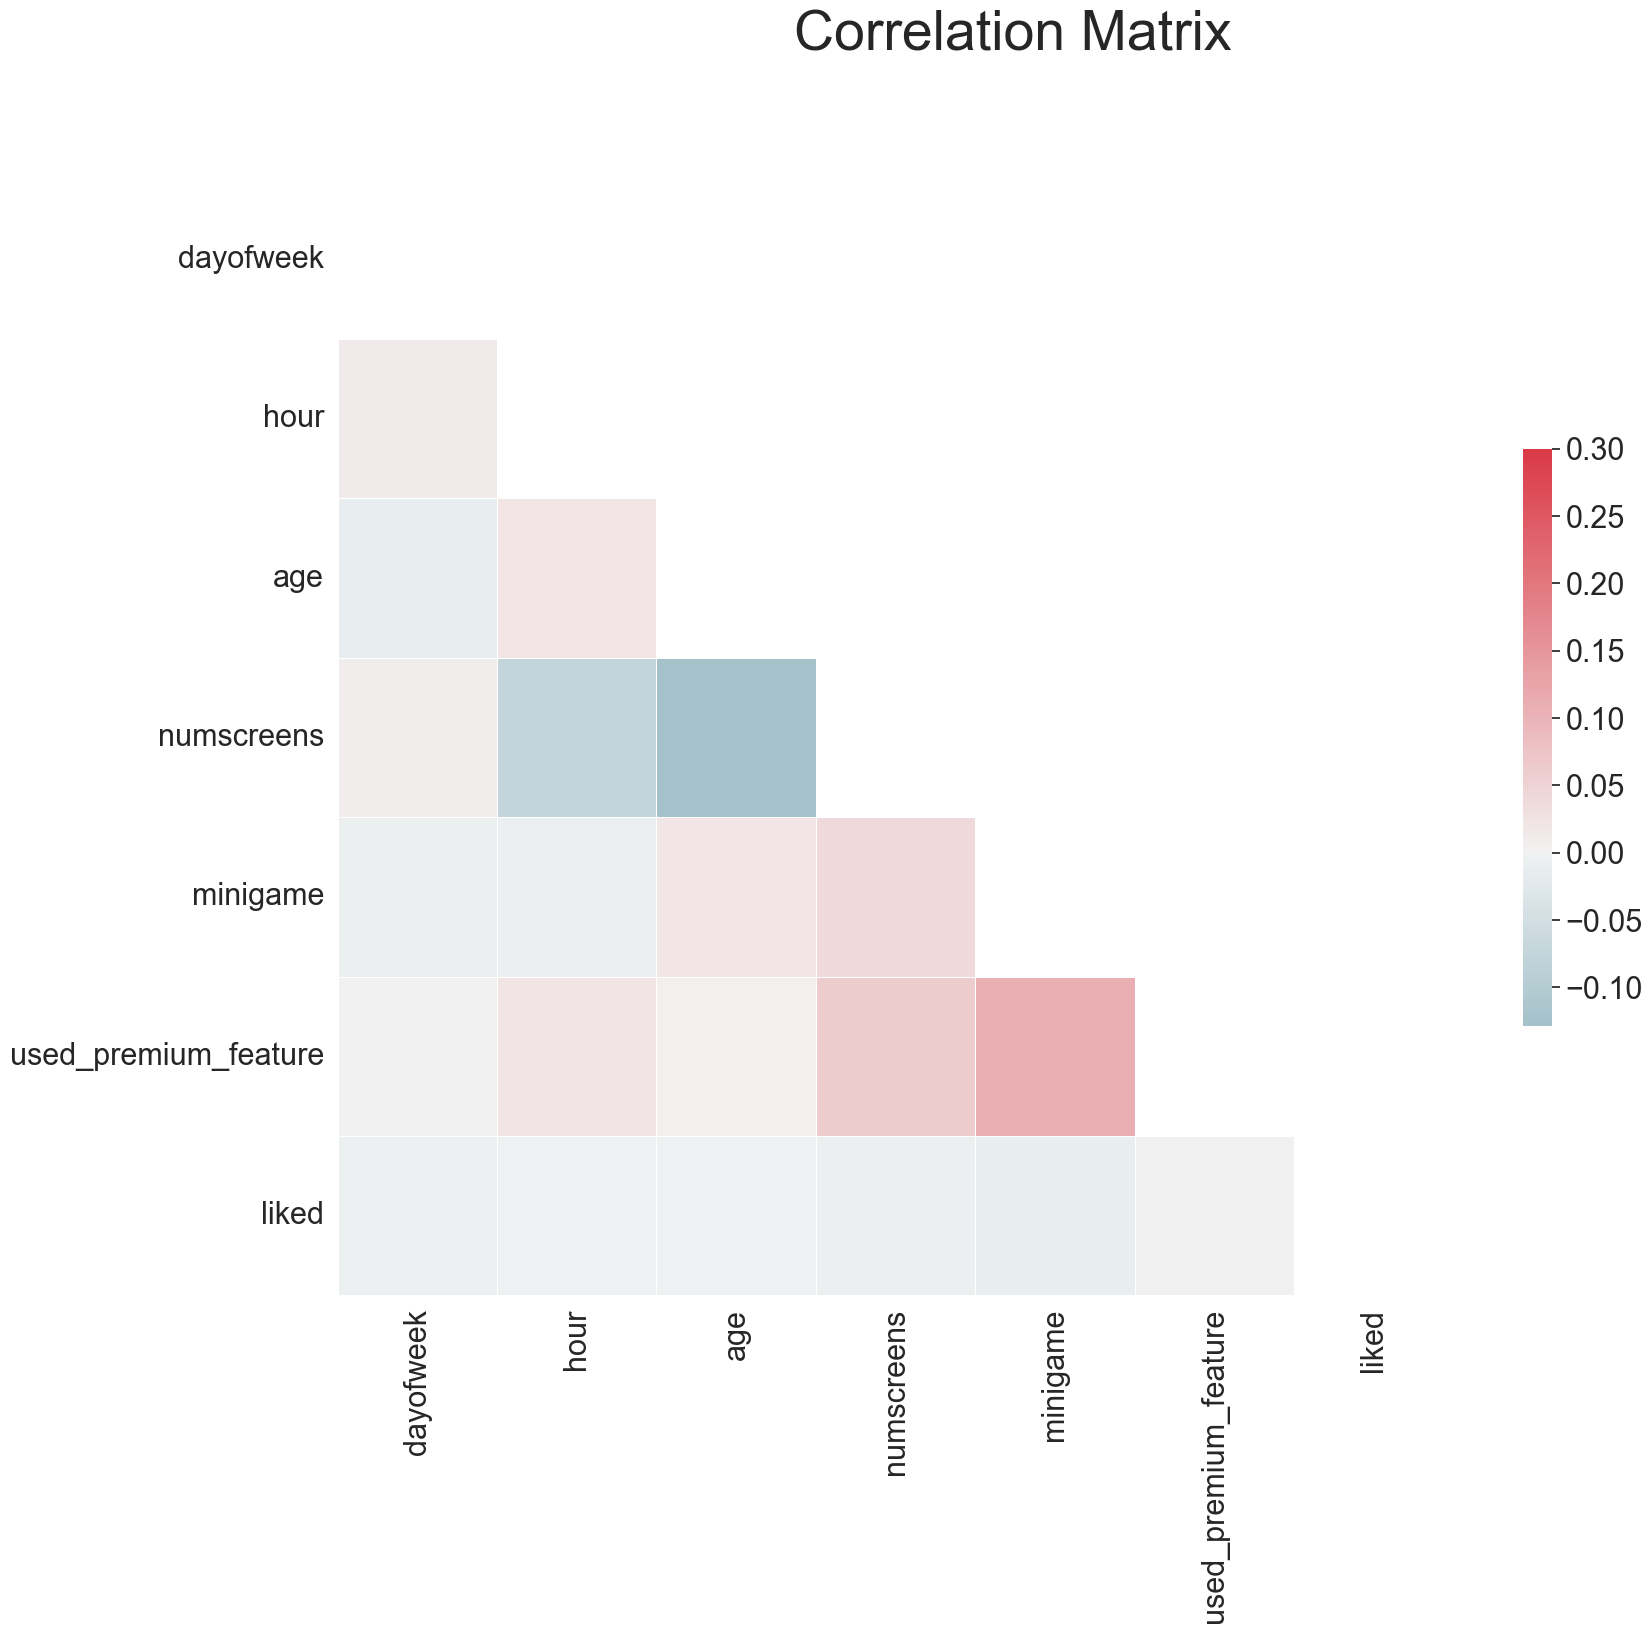

In [13]:
sn.set(style = 'white', font_scale = 2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f , ax  =plt.subplots(figsize = (18,15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr , mask = mask , cmap = cmap , vmax = .3 , center = 0,
           square = True, linewidths = .5, cbar_kws = {'shrink':.5})

Feature engineering

In [14]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [16]:
dataset['enrolled_date']  = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]

In [17]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [18]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).dt.total_seconds() / 3600


In [19]:
dataset['difference']

0             NaN
1             NaN
2             NaN
3        0.050877
4        0.096994
           ...   
49995    0.026390
49996         NaN
49997         NaN
49998    0.042895
49999         NaN
Name: difference, Length: 50000, dtype: float64

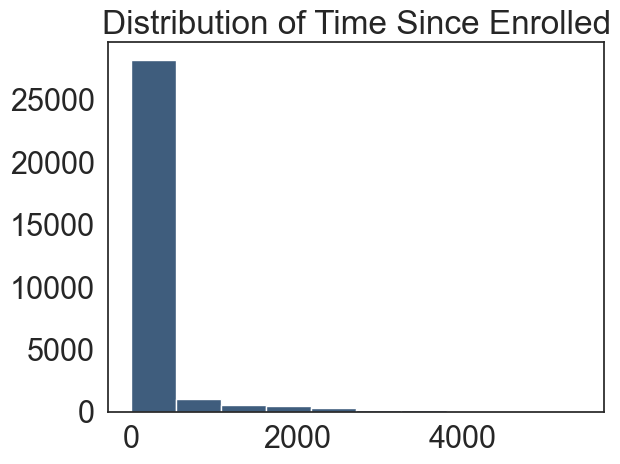

In [20]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D')
plt.title("Distribution of Time Since Enrolled")
plt.show()

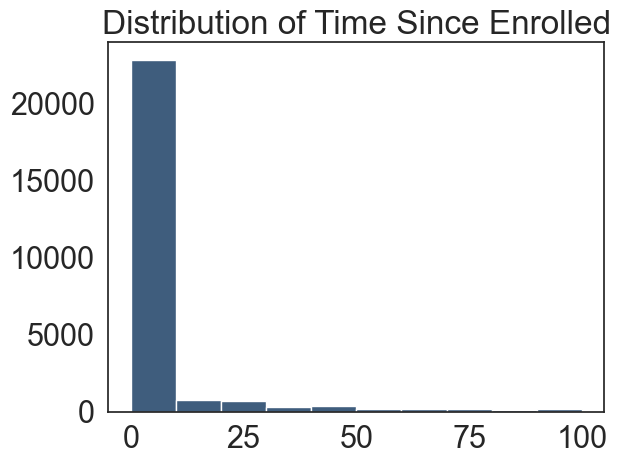

In [21]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range = [0,100])
plt.title("Distribution of Time Since Enrolled")
plt.show()

In [22]:
dataset.loc[dataset.difference > 48 , 'enrolled'] = 0

In [23]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

Formatting the screen_list Field

In [24]:
top_screens = pd.read_csv("top_screens.csv").top_screens.values

In [25]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [26]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','')
    
dataset['other'] = dataset.screen_list.str.count(',')
dataset.drop(columns =['screen_list'])

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


Funnels (Group of scenes that belong to the same set)

In [27]:
savings_screens = ['Saving1',
                   'Saving2',
                   'Saving2Amount',
                   'Saving4',
                   'Saving5',
                   'Saving6',
                   'Saving7',
                   'Saving8',
                   'Saving9',
                   'Saving10']
dataset['Savingscount']= dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

In [28]:

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [29]:
dataset.drop(columns =['screen_list'] ,inplace = True)

In [30]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,Savingscount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [31]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'Savingscount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [32]:
dataset.to_csv('New_appdata10.csv', index = False)

Data Preprocessing

In [33]:
Response = dataset['enrolled']

In [34]:
dataset = dataset.drop(columns = ['enrolled'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, Response, test_size=0.2, random_state= 0 )

In [36]:
X_train.shape

(40000, 49)

In [37]:
X_test.shape

(10000, 49)

In [38]:
y_train.shape

(40000,)

In [39]:
y_test.shape

(10000,)

In [40]:
X_train_identifier = X_train['user']
X_train.drop(columns = ['user'], inplace= True)

X_test_identifier = X_test['user']
X_test.drop(columns = ['user'], inplace = True)


Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [42]:
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test))

In [43]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
2,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
3,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
4,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.972325,1.404166,-1.175102,-0.963062,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789
39996,-1.489818,0.328622,-0.898034,-1.090390,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.418852,-0.260877,0.057524,-0.289185,0.309800
39997,-0.012532,-0.881364,-0.620967,1.392493,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,3.976153,-0.763372,-0.289185,-1.165789
39998,0.479896,0.059736,-0.436255,-1.090390,2.883254,-0.457453,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789


In [44]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,Savingscount,CMCount,CCCount,LoansCount
20330,2,20,32,5,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,1,21,22,42,1,0,0,1,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,0,4,26,85,1,0,0,0,1,0,...,0,0,0,0,0,10,0,2,1,2
34807,4,13,25,24,1,0,0,1,0,0,...,0,0,0,0,0,10,0,0,0,1
31888,3,16,50,11,0,0,0,1,0,1,...,0,0,0,0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,23,19,6,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
45891,0,15,22,4,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
42613,3,6,25,43,0,0,0,0,1,0,...,0,0,0,0,0,4,6,0,0,0
43567,4,13,27,4,1,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [45]:
X_train_scaled.columns =X_train.columns

In [46]:
X_test.columns = X_test.columns

In [47]:
X_train_scaled.index  = X_train.index.values

In [48]:
X_test_scaled.index = X_test.index.values

In [49]:
X_train = X_train_scaled
X_test = X_test_scaled

Model training

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score

classifier = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')

classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [51]:
y_pred = classifier.predict(X_test)

c:\Users\naren\anaconda3\envs\Sales_Forcast\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
print("The accuray of the model ",accuracy_score(y_test, y_pred))

The accuray of the model  0.7683


In [53]:
print("precision score", precision_score(y_test, y_pred))

precision score 0.7602245388933441


In [54]:
print("recall score", recall_score(y_test, y_pred))

recall score 0.7718298392021168


In [55]:
print("F1 Score",f1_score(y_test, y_pred))

F1 Score 0.765983234016766


In [56]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

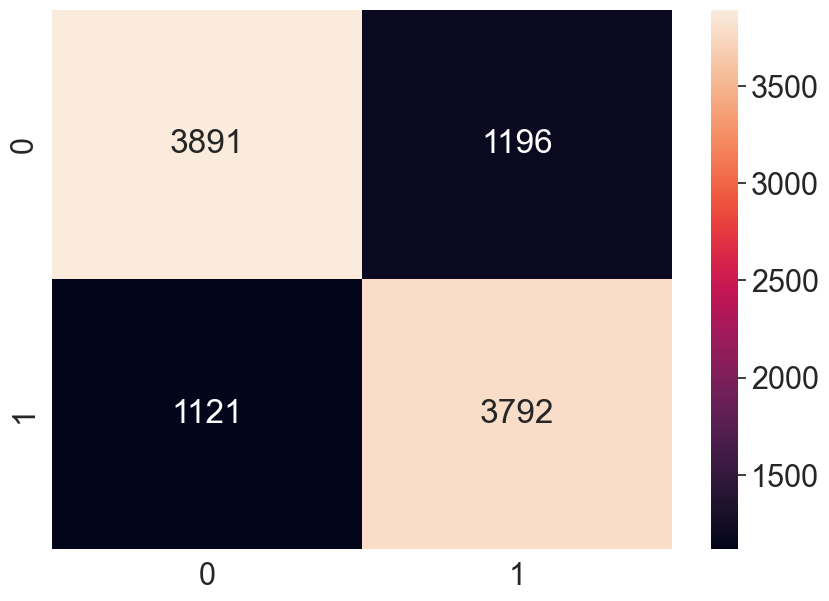

In [57]:
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True , fmt='g')

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier ,X_train, y_train ,cv =10)

In [59]:
print("{:.3f}(+/-{:.3f})".format(scores.mean(),scores.std()* 2))

0.768(+/-0.009)


In [60]:
y_pred_prob = classifier.predict_proba(X_test)

c:\Users\naren\anaconda3\envs\Sales_Forcast\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
import matplotlib.pyplot as plt

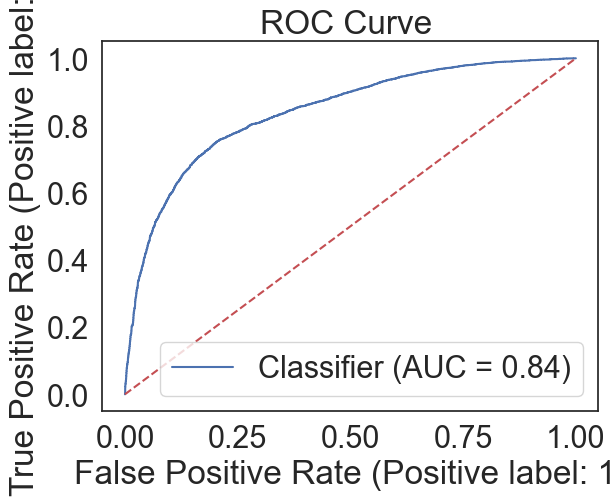

In [62]:
from sklearn.metrics import RocCurveDisplay


roc_curve = RocCurveDisplay.from_predictions(y_test, y_pred_prob[:,1])
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve ")
plt.show()

Formatting the final results

In [63]:
result = pd.concat([y_test, X_test_identifier],axis = 1).dropna()
result['predictions'] = y_pred


In [64]:
result = result[['user', 'enrolled','predictions']].reset_index(drop = True)

In [65]:
pd.set_option('display.max_rows',None)
result.head()

,user,enrolled,predictions
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
